<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-groups" data-toc-modified-id="Load-groups-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load groups</a></span></li><li><span><a href="#load-csv-to-get-certain-rois" data-toc-modified-id="load-csv-to-get-certain-rois-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>load csv to get certain rois</a></span><ul class="toc-item"><li><span><a href="#PC-EITHER-EXAMPLE" data-toc-modified-id="PC-EITHER-EXAMPLE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PC EITHER EXAMPLE</a></span></li></ul></li><li><span><a href="#control" data-toc-modified-id="control-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>control</a></span></li><li><span><a href="#CREB" data-toc-modified-id="CREB-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CREB</a></span></li><li><span><a href="#dn-CREB" data-toc-modified-id="dn-CREB-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>dn-CREB</a></span></li><li><span><a href="#plot-overlays" data-toc-modified-id="plot-overlays-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>plot overlays</a></span><ul class="toc-item"><li><span><a href="#control" data-toc-modified-id="control-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>control</a></span></li><li><span><a href="#CREB" data-toc-modified-id="CREB-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>CREB</a></span></li><li><span><a href="#dn-CREB" data-toc-modified-id="dn-CREB-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>dn-CREB</a></span></li></ul></li><li><span><a href="#Multi-day-roi-plots" data-toc-modified-id="Multi-day-roi-plots-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Multi day roi plots</a></span><ul class="toc-item"><li><span><a href="#control" data-toc-modified-id="control-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>control</a></span><ul class="toc-item"><li><span><a href="#two-days-diff-sessions" data-toc-modified-id="two-days-diff-sessions-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>two days diff sessions</a></span></li></ul></li><li><span><a href="#CREB" data-toc-modified-id="CREB-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>CREB</a></span></li><li><span><a href="#dn-CREB" data-toc-modified-id="dn-CREB-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>dn-CREB</a></span></li><li><span><a href="#multi-blank-bg" data-toc-modified-id="multi-blank-bg-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>multi blank bg</a></span></li></ul></li><li><span><a href="#all-sessions" data-toc-modified-id="all-sessions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>all sessions</a></span><ul class="toc-item"><li><span><a href="#prototype-single-group" data-toc-modified-id="prototype-single-group-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>prototype single group</a></span></li></ul></li></ul></div>

# Load groups

In [1]:
# function to get top spatial info roi_filter
def get_filter(grp):
    
    df_si = pca.spatial_information(grp)
    df_si.sort_values("value", ascending = False)
    df = df_si.nlargest(6, "value")

    import pdb; pdb.set_trace()
    def top_filter(roi):
        return roi in set(df.roi.values)


    return top_filter


def roi_color_values(grp,shuffle_colors=False):
    """assigns a color value to all rois in exptGrp"""
    
    # gather list of rois
    all_rois = grp.allROIs(channel=exptGrp.args['channel'],
                           label=exptGrp.args['imaging_label'])

    cv = np.linspace(0,1,len(all_rois))
    if shuffle_colors:
        random.shuffle(cv)

    rr= []
    for r in all_rois:
           rr.append(r[2])

    color_df = pd.DataFrame(cv,rr,columns=["cv"])
    
    return color_df

def plot_rois_across_sessions(axs,exptGrp,bg_blank=False,alpha=.3):
    """plots rois across sessions, keeps color the same"""

    for e,ax in zip(grp1,axs.flatten()):
        
        g = exptGrp.subGroup([e])

        # need to grab filter b/c thats what plotting function does
        pcs_filter = g.pcs_filter(roi_filter=None)

        # channel, label important to get the right roi_ids
        grp_rois = g.roi_ids(channel=g.args['channel'],
                               label=g.args['imaging_label'],
                               roi_filter=pcs_filter)[g[0]]

        # use pc rois to grab the predefined color values
        roi_colors = color_df.loc[grp_rois].cv.values

        
        # perhaps a hack to use spatial tuning overlay,
        # but modified to take in values variable
        pca.plot_spatial_tuning_overlay(ax, g,
                                        roi_filter = None,
                                        labels_visible=False,
                                        cvalues = roi_colors,
                                        bg_blank=bg_blank,
                                        alpha=alpha)
                                       #cax=axs[3])

    plt.show()


In [ ]:
from lab.figures import place_cell_figures as pcf
from lab.analysis import place_cell_analysis as pca
import random



# load groups
exptGrps,roi_filters = creb.load_creb_experiments(filter_type=None,from_file=True)

# var for return dfs
cols = ['condition_day_session','mouseID','day','session','condition','trial_id']

# load csv to get certain rois

In [244]:
df = pd.read_csv('big-df-by-roi.csv') # by roi


# novel functions
def make_pc_group(expt_list):
    pc_kwargs = {'nPositionBins': 100,
                 'channel': 'Ch2',
                 'imaging_label': 'suite2p_registered',
                 'demixed': False}
    group = pcExperimentGroup(expt_list, label='', **pc_kwargs)
    
    return group


def plot_two_cells(rind):
    e1 = df_high.iloc[rind].first_expt
    e2 = df_high.iloc[rind].second_expt
    r1  = df_high.iloc[rind].first_roi
    r2 = df_high.iloc[rind].second_roi

    pc_group = make_pc_group([e1,e2])

    def single_filter(roi):
        return roi in set([r1,r2])


    two_cells = pcf.place_cell_heatmaps(pc_group,roi_filter=single_filter,pcs_only=False,show_pf=False,smooth_x=True)
    
    return two_cells



# from stability notebook
def just_day(df,shuffle=False):
    df_day = df[df.pairing =='day']
    if shuffle:
        return rm_shuffle(df_day), just_shuffle(df_day)
    else: 
        return rm_shuffle(df_day)
def rm_shuffle(df):
    return df[(df.grp !='shuffle')]

def just_session(df,shuffle=False):
    df_sess = df[df.pairing =='session']
    if shuffle:
        return rm_shuffle(df_sess), just_shuffle(df_sess)
    else: 
        return rm_shuffle(df_sess)

In [304]:
# merge with stab
all_dfs_roi = mjdhelp.read_from_pickle('stability-just-pf-corr-PCboth-for-expt-objects.pkl')
df_corr = just_session(all_dfs_roi['pf_correlation'])

df_corr = mjdplot.roi_to_label(df_corr,col="first_roi")
df_corr["trial_id"] = df_corr.trial_id.astype('int64')
df.rename(columns = {'expt_grp':'grp'},inplace=True)
df_merge = pd.merge(df,df_corr,on=["grp","trial_id","roi_label"])

Turned roi title off
mjd511 2017-12-13-22h12m12s
<ROI set: nROIs=1, timestamp=None>
mjd511 2017-12-14-20h18m14s
<ROI set: nROIs=1, timestamp=None>


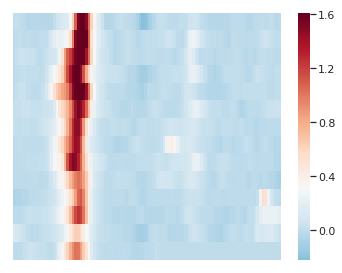

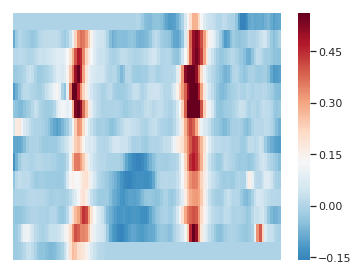

In [210]:
df_high = df_merge.query("grp == 'Control' and value < .2 and spatial_information > 1")
rind = 38

two_cells = plot_two_cells(rind)



Turned roi title off
mjd527 2018-04-26-13h10m34s
<ROI set: nROIs=1, timestamp=None>
mjd527 2018-04-27-11h55m48s
<ROI set: nROIs=1, timestamp=None>


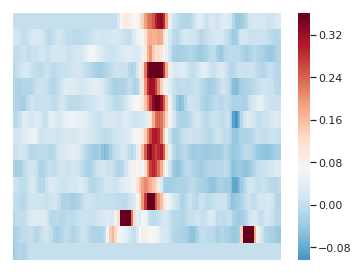

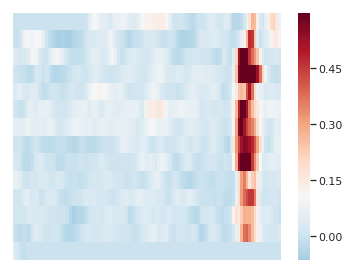

In [305]:
df_high = df_merge.query("grp == 'dn-CREB' and value < .2 and spatial_information > 1")
rind = 38

two_cells = plot_two_cells(rind)

Turned roi title off
mjd529 2018-04-22-17h58m43s
<ROI set: nROIs=1, timestamp=None>
mjd529 2018-04-22-19h30m55s
<ROI set: nROIs=1, timestamp=None>


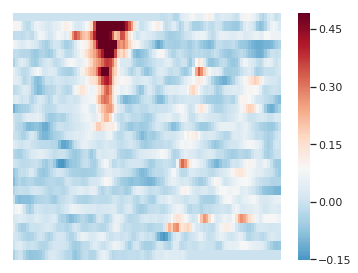

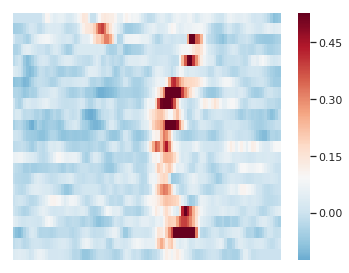

In [309]:
df_high = df_merge.query("grp == 'CREB' and value < .2 and spatial_information > 1")
rind = 105

two_cells = plot_two_cells(rind)

Turned roi title off
mjd533 2018-06-09-14h04m23s
<ROI set: nROIs=1, timestamp=None>
mjd533 2018-06-09-16h39m32s
<ROI set: nROIs=1, timestamp=None>


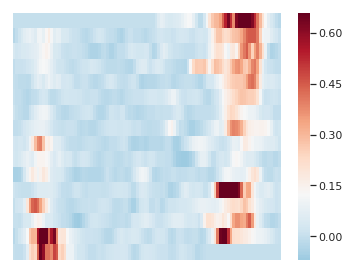

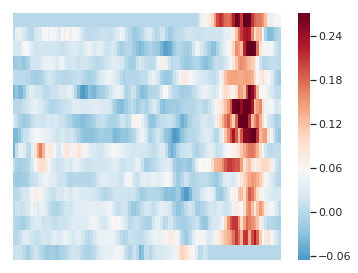

In [257]:
df_high = df_merge.query("grp == 'CREB' and value < .5 and spatial_information > 2")
rind = 8

two_cells = plot_two_cells(rind)

In [ ]:
df_high = df_merge.query("grp == 'CREB' and value < .2 and spatial_information > 1")
rind = 105

two_cells = plot_two_cells(rind)

## PC EITHER EXAMPLE

In [312]:
all_dfs_roi = mjdhelp.read_from_pickle('stability-just-pf-corr-PCeither-for-expt-objects.pkl')

df_corr = just_session(all_dfs_roi['pf_correlation'])
df_corr = mjdplot.roi_to_label(df_corr,col="first_roi")
df_corr["trial_id"] = df_corr.trial_id.astype('int64')
df.rename(columns = {'expt_grp':'grp'},inplace=True)
df_merge = pd.merge(df,df_corr,on=["grp","trial_id","roi_label"])

Turned roi title off
mjd511 2017-12-09-17h30m39s
<ROI set: nROIs=1, timestamp=None>
mjd511 2017-12-09-18h42m01s
<ROI set: nROIs=1, timestamp=None>


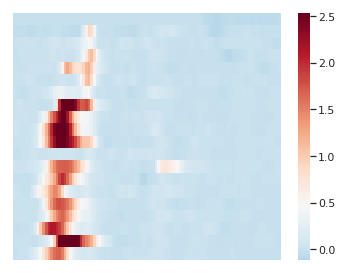

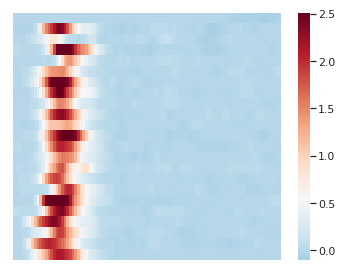

In [322]:
df_high = df_merge.query("grp == 'Control' and value < .5 and spatial_information > 2")
rind = 6

two_cells = plot_two_cells(rind)

Turned roi title off
mjd537 2018-06-19-13h19m46s
<ROI set: nROIs=1, timestamp=None>
mjd537 2018-06-20-10h48m26s
<ROI set: nROIs=1, timestamp=None>


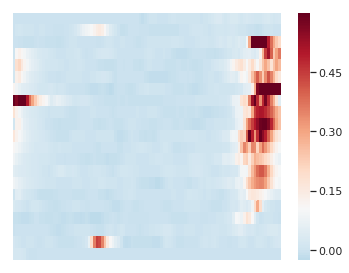

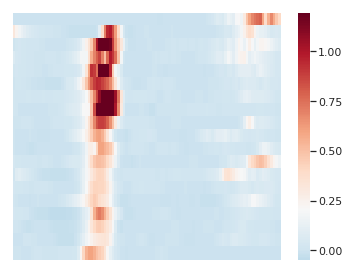

In [325]:
df_high = df_merge.query("grp == 'Control' and value < .5 and spatial_information > 2")
rind = 89

two_cells = plot_two_cells(rind)

Turned roi title off
mjd500 2017-11-30-18h15m13s
<ROI set: nROIs=1, timestamp=None>
mjd500 2017-12-01-14h01m06s
<ROI set: nROIs=1, timestamp=None>


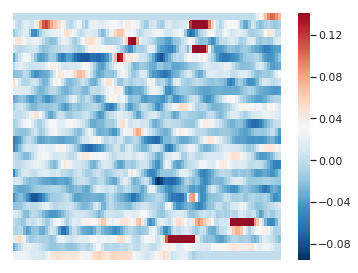

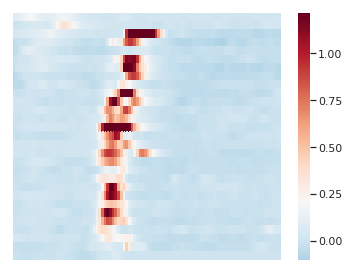

In [328]:
df_high = df_merge.query("grp == 'Control' and value < .1 and spatial_information > 2")
rind = 21

two_cells = plot_two_cells(rind)

Turned roi title off
mjd012 2017-08-20-21h17m00s
<ROI set: nROIs=1, timestamp=None>
mjd012 2017-08-21-18h42m47s
<ROI set: nROIs=1, timestamp=None>


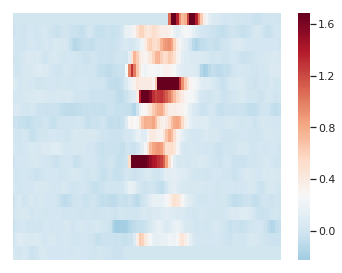

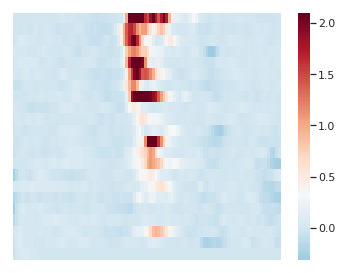

In [342]:
df_high = df_merge.query("grp == 'dn-CREB' and value > .8 and spatial_information > 2")
rind = 1

two_cells = plot_two_cells(rind)

# control

In [ ]:
exptGrp = exptGrps[0]
#func1 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd535')
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd535')
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)


top_filter = get_filter(grp1)

Turned roi title off
mjd535 2018-06-20-12h59m18s


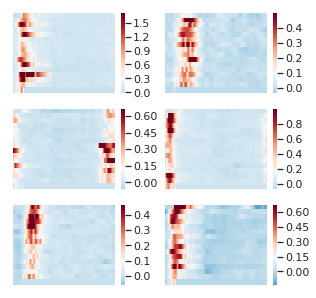

In [34]:
g = pcf.place_cell_heatmaps(grp1,roi_filter =top_filter,pcs_only=True,show_pf=False,smooth_x=True)
g[0].savefig('figs/F03-place-cell-lap-control.svg')
#g[1].savefig('figs/F03-place-cell-lap-control2.svg')

# CREB

In [14]:
exptGrp = exptGrps[1]
func2 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd533')
grp2 = exptGrp.filterby(filter_fn=func2,include_columns=cols,inplace=False)


top_filter2 = get_filter(grp2)

Turned roi title off
mjd533 2018-06-10-16h09m34s


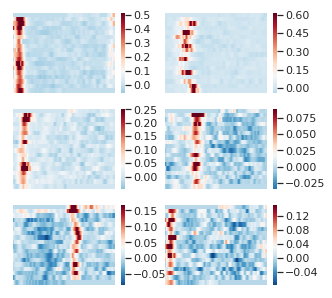

In [35]:
g = pcf.place_cell_heatmaps(grp2,roi_filter =top_filter2,pcs_only=True,show_pf=False,smooth_x=True)
g[0].savefig('figs/F03-place-cell-lap-creb.svg')

# dn-CREB

In [17]:
exptGrp = exptGrps[2]
func3 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd526')
grp3 = exptGrp.filterby(filter_fn=func3,include_columns=cols,inplace=False)


top_filter3 = get_filter(grp3)

Turned roi title off
mjd526 2018-04-24-13h15m15s


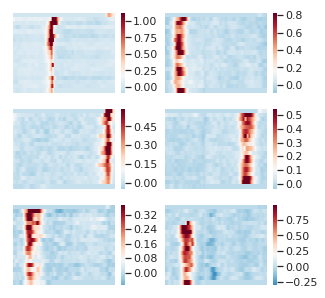

In [36]:
g = pcf.place_cell_heatmaps(grp3,roi_filter =top_filter3,pcs_only=True,show_pf=False,smooth_x=True)
g[0].savefig('figs/F03-place-cell-lap-dncreb.svg')

# plot overlays

## control

In [26]:
exptGrp = exptGrps[0]
#func1 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd535')
func1 = lambda df: (df['condition_day_session'] == 'A_0_2') & (df['mouseID']=='mjd537')
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)


top_filter = get_filter(grp1)

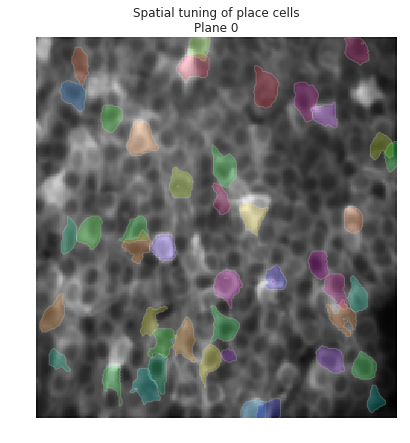

In [27]:
fig,ax = plt.subplots(1,figsize=(7,7))
pca.plot_spatial_tuning_overlay(ax, grp1,
                                #roi_filter = top_filter,
                                labels_visible=False)
plt.show()

## CREB

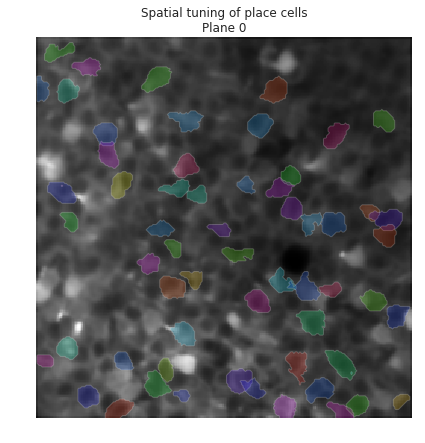

In [47]:
exptGrp = exptGrps[1]
func2 = lambda df: (df['condition_day_session'] == 'A_0_2') & (df['mouseID']=='mjd532')
grp2 = exptGrp.filterby(filter_fn=func2,include_columns=cols,inplace=False)


top_filter2 = get_filter(grp2)


fig,ax = plt.subplots(1,figsize=(7,7))
pca.plot_spatial_tuning_overlay(ax, grp2,
                                roi_filter = None,
                                labels_visible=False)
plt.show()

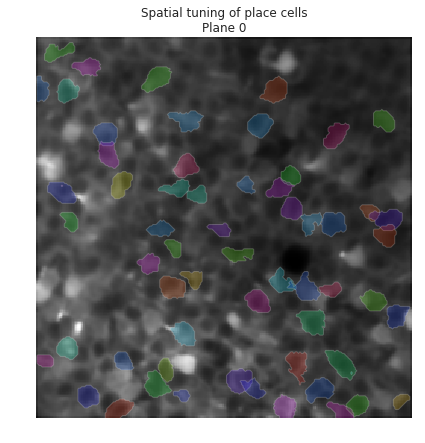

In [31]:
fig,ax = plt.subplots(1,figsize=(7,7))
pca.plot_spatial_tuning_overlay(ax, grp2,
                                roi_filter = None,
                                labels_visible=False)
plt.show()

## dn-CREB

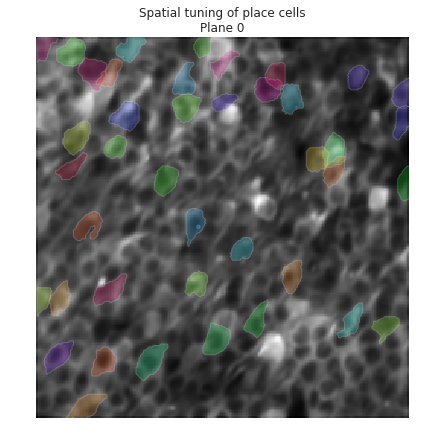

In [44]:
exptGrp = exptGrps[2]
func3 = lambda df: (df['condition_day_session'] == 'A_0_1') & (df['mouseID']=='mjd527')
grp3 = exptGrp.filterby(filter_fn=func3,include_columns=cols,inplace=False)


top_filter3 = get_filter(grp3)


fig,ax = plt.subplots(1,figsize=(7,7))
pca.plot_spatial_tuning_overlay(ax, grp3,
                                roi_filter = None,
                                labels_visible=False)
plt.show()

# Multi day roi plots

In [ ]:
# example filters
# func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd535')

## control

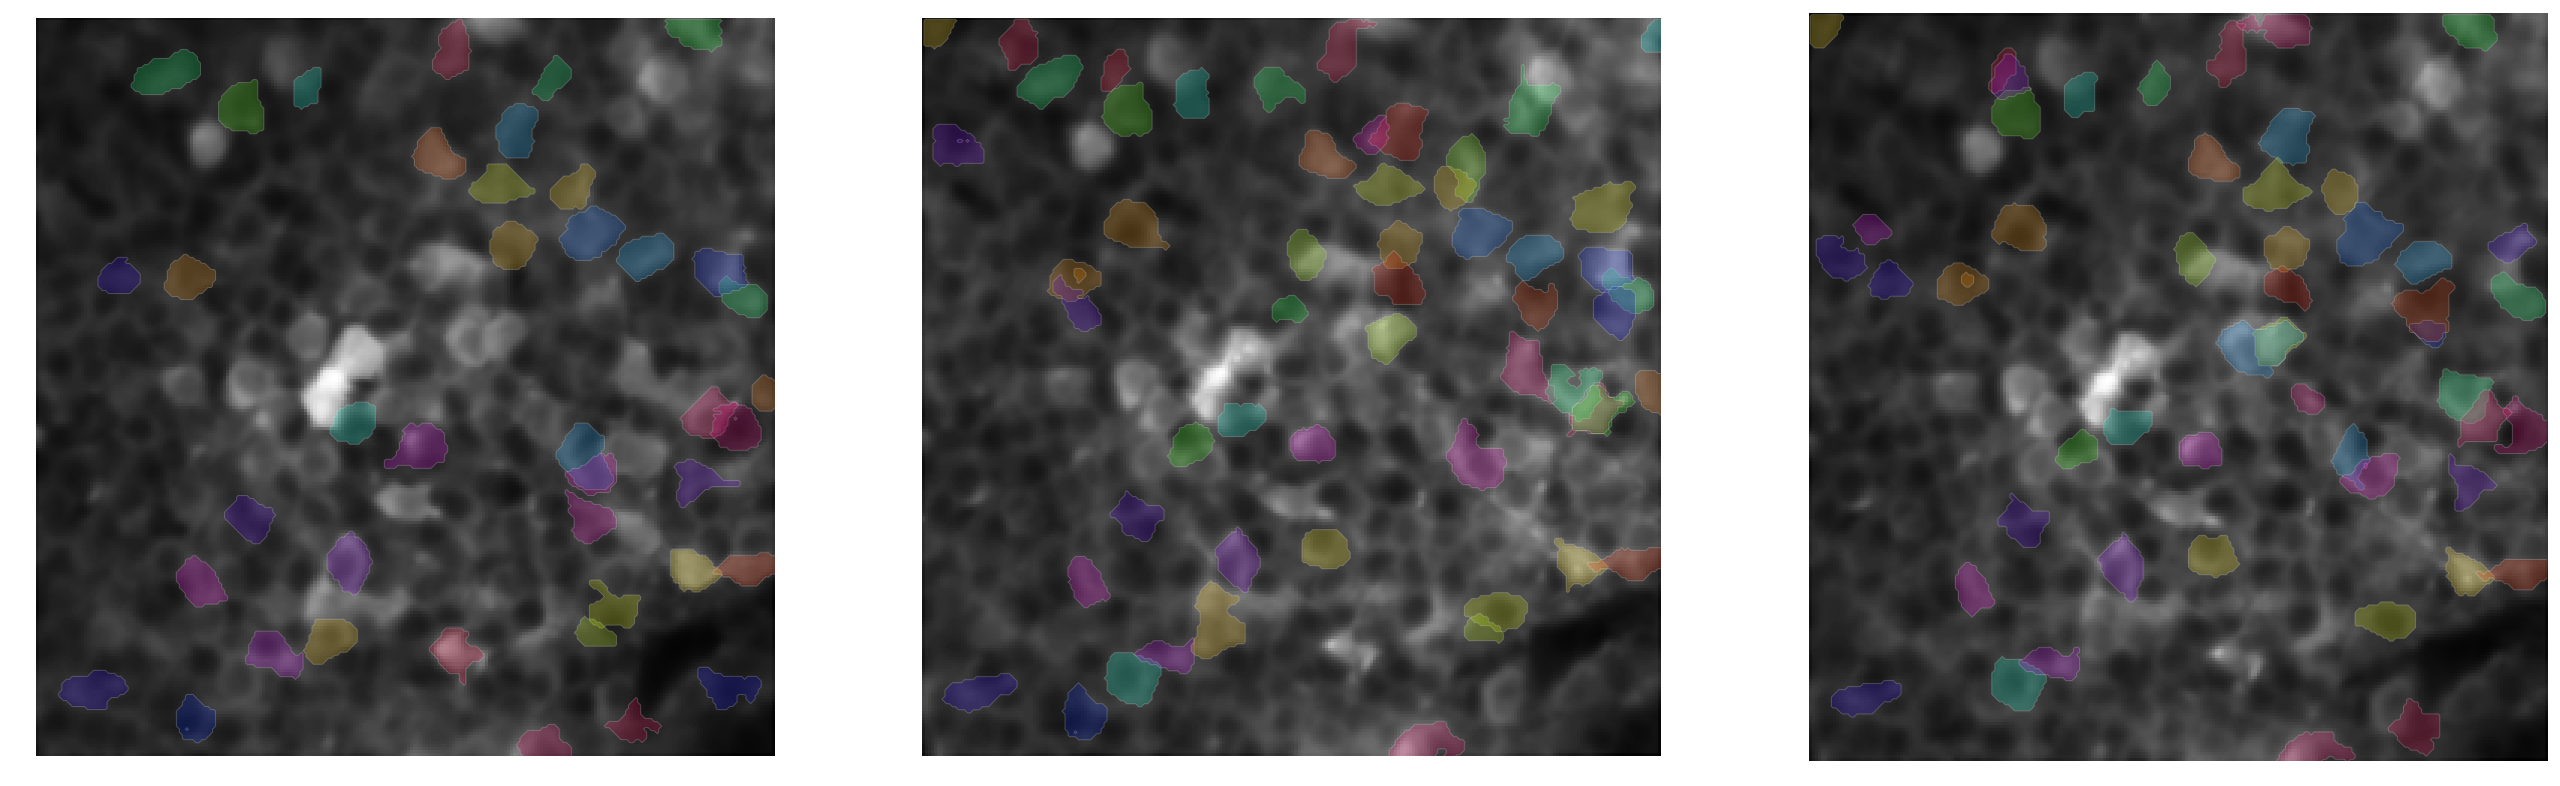

In [2]:
cols = ['condition_day_session','mouseID','day','session','condition','condition_day']

exptGrp = exptGrps[0]

# filter expt  
func1 = lambda df: (df['condition_day'] == 'A_2') & (df['mouseID']=='mjd535')
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)

# get colors
color_df = roi_color_values(grp1,shuffle_colors = True)

# plot rois
fig,axs = plt.subplots(1,3,figsize=(45,35))
plot_rois_across_sessions(axs,grp1)

### two days diff sessions

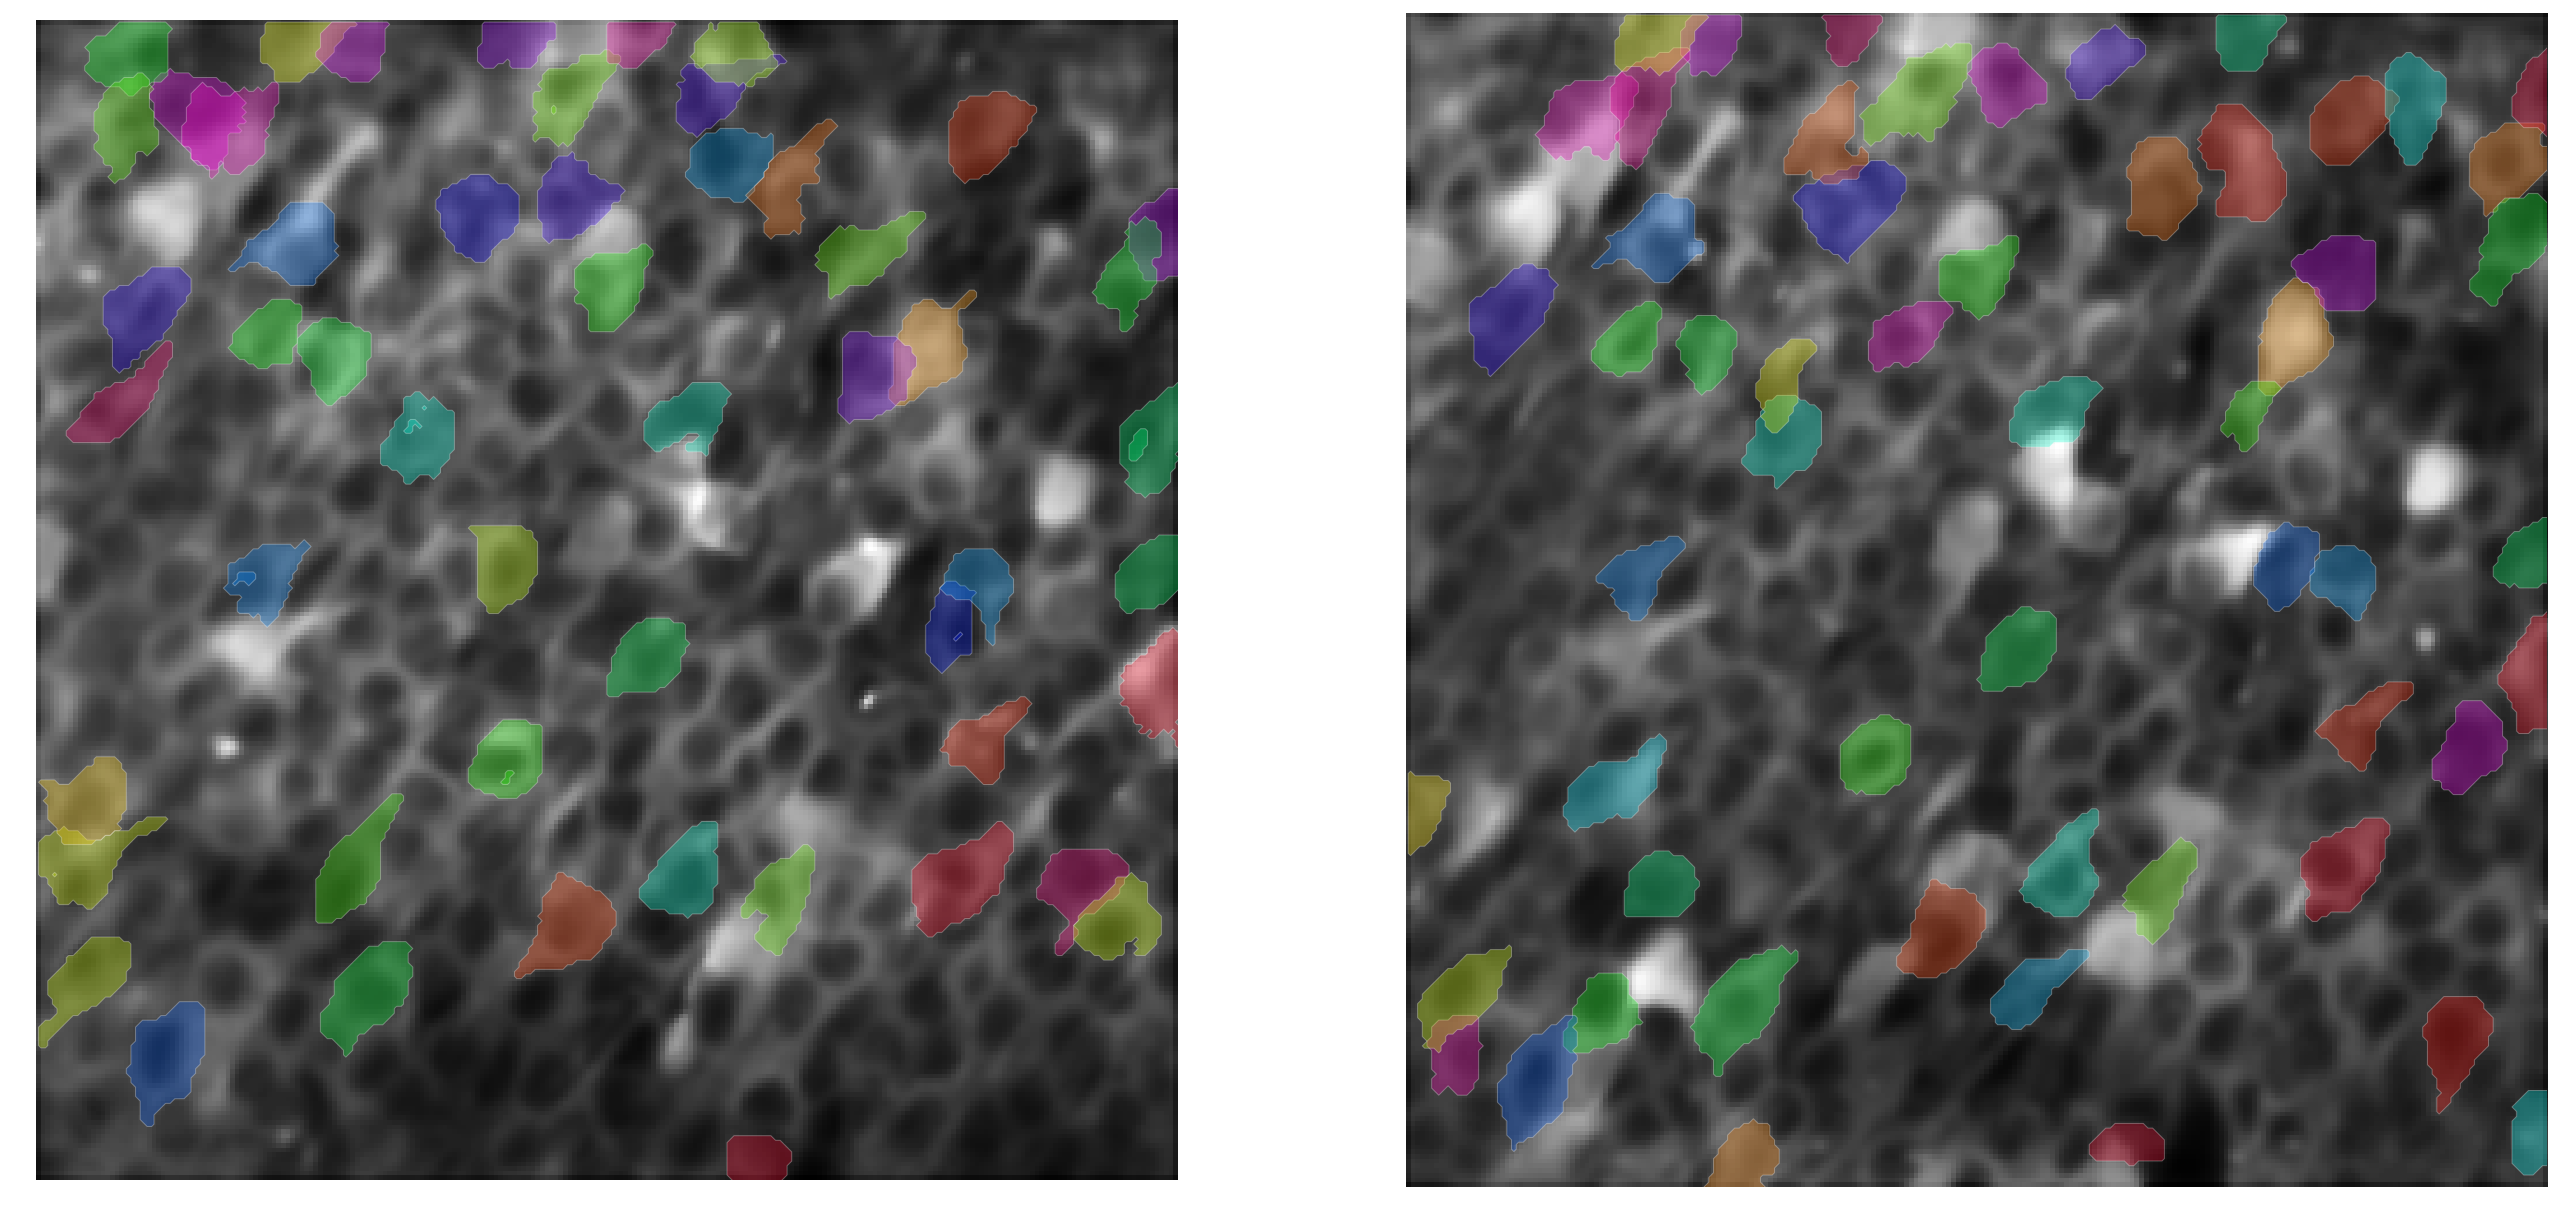

In [13]:
cols = ['condition_day_session','mouseID','day','session','condition','condition_day']

exptGrp = exptGrps[2]

# filter expt  
func1 = lambda df: (df['condition_day_session'].isin(['A_0_0','B_2_2']) & (df['mouseID']=='mjd527'))
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)

# get colors
color_df = roi_color_values(grp1,shuffle_colors = True)

# plot rois
fig,axs = plt.subplots(1,2,figsize=(45,35))
plot_rois_across_sessions(axs,grp1)

## CREB
* A_1 good

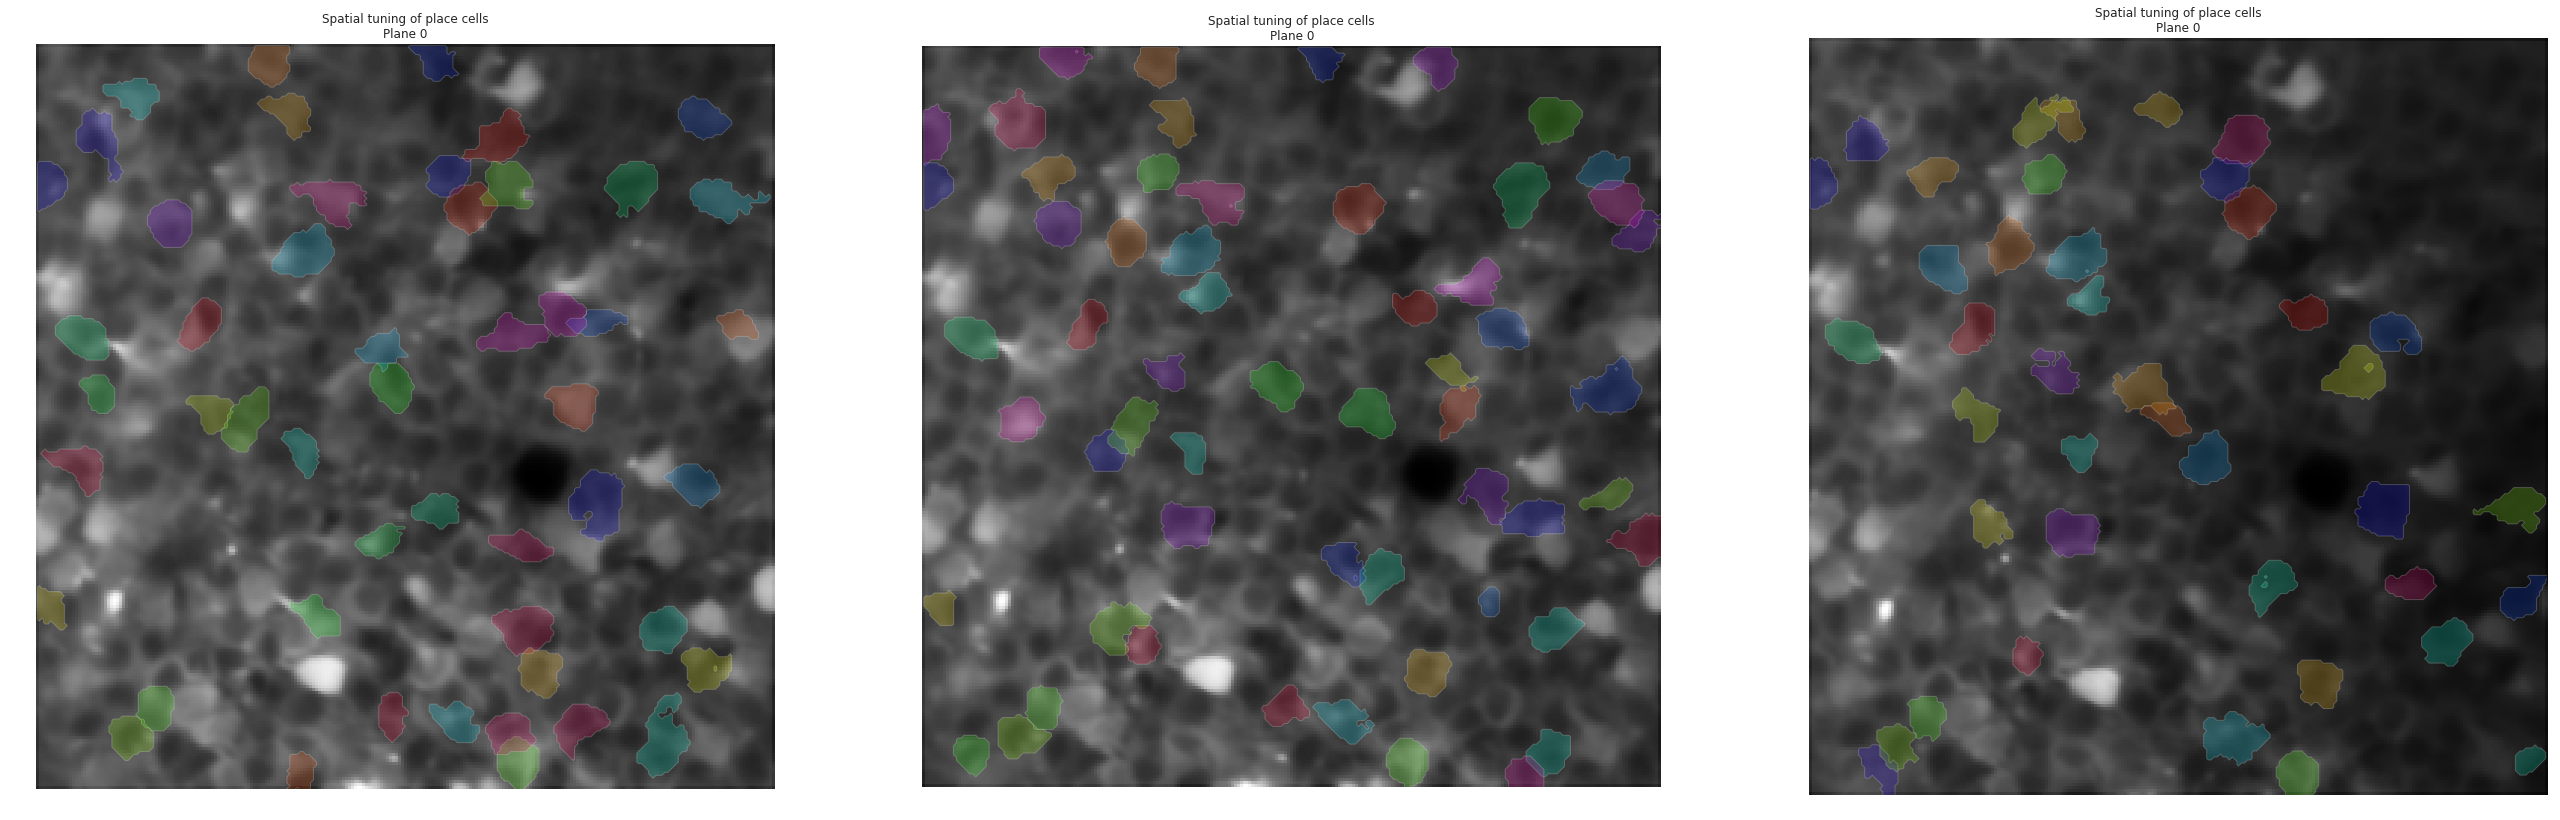

In [18]:
cols = ['condition_day_session','mouseID','day','session','condition','condition_day']

exptGrp = exptGrps[1]

# filter expt  
func1 = lambda df: (df['condition_day'] == 'A_1') & (df['mouseID']=='mjd532')
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)

# get colors
color_df = roi_color_values(grp1,shuffle_colors = True)

# plot rois
fig,axs = plt.subplots(1,3,figsize=(45,35))
plot_rois_across_sessions(axs,grp1)

## dn-CREB
* B_0 looks good

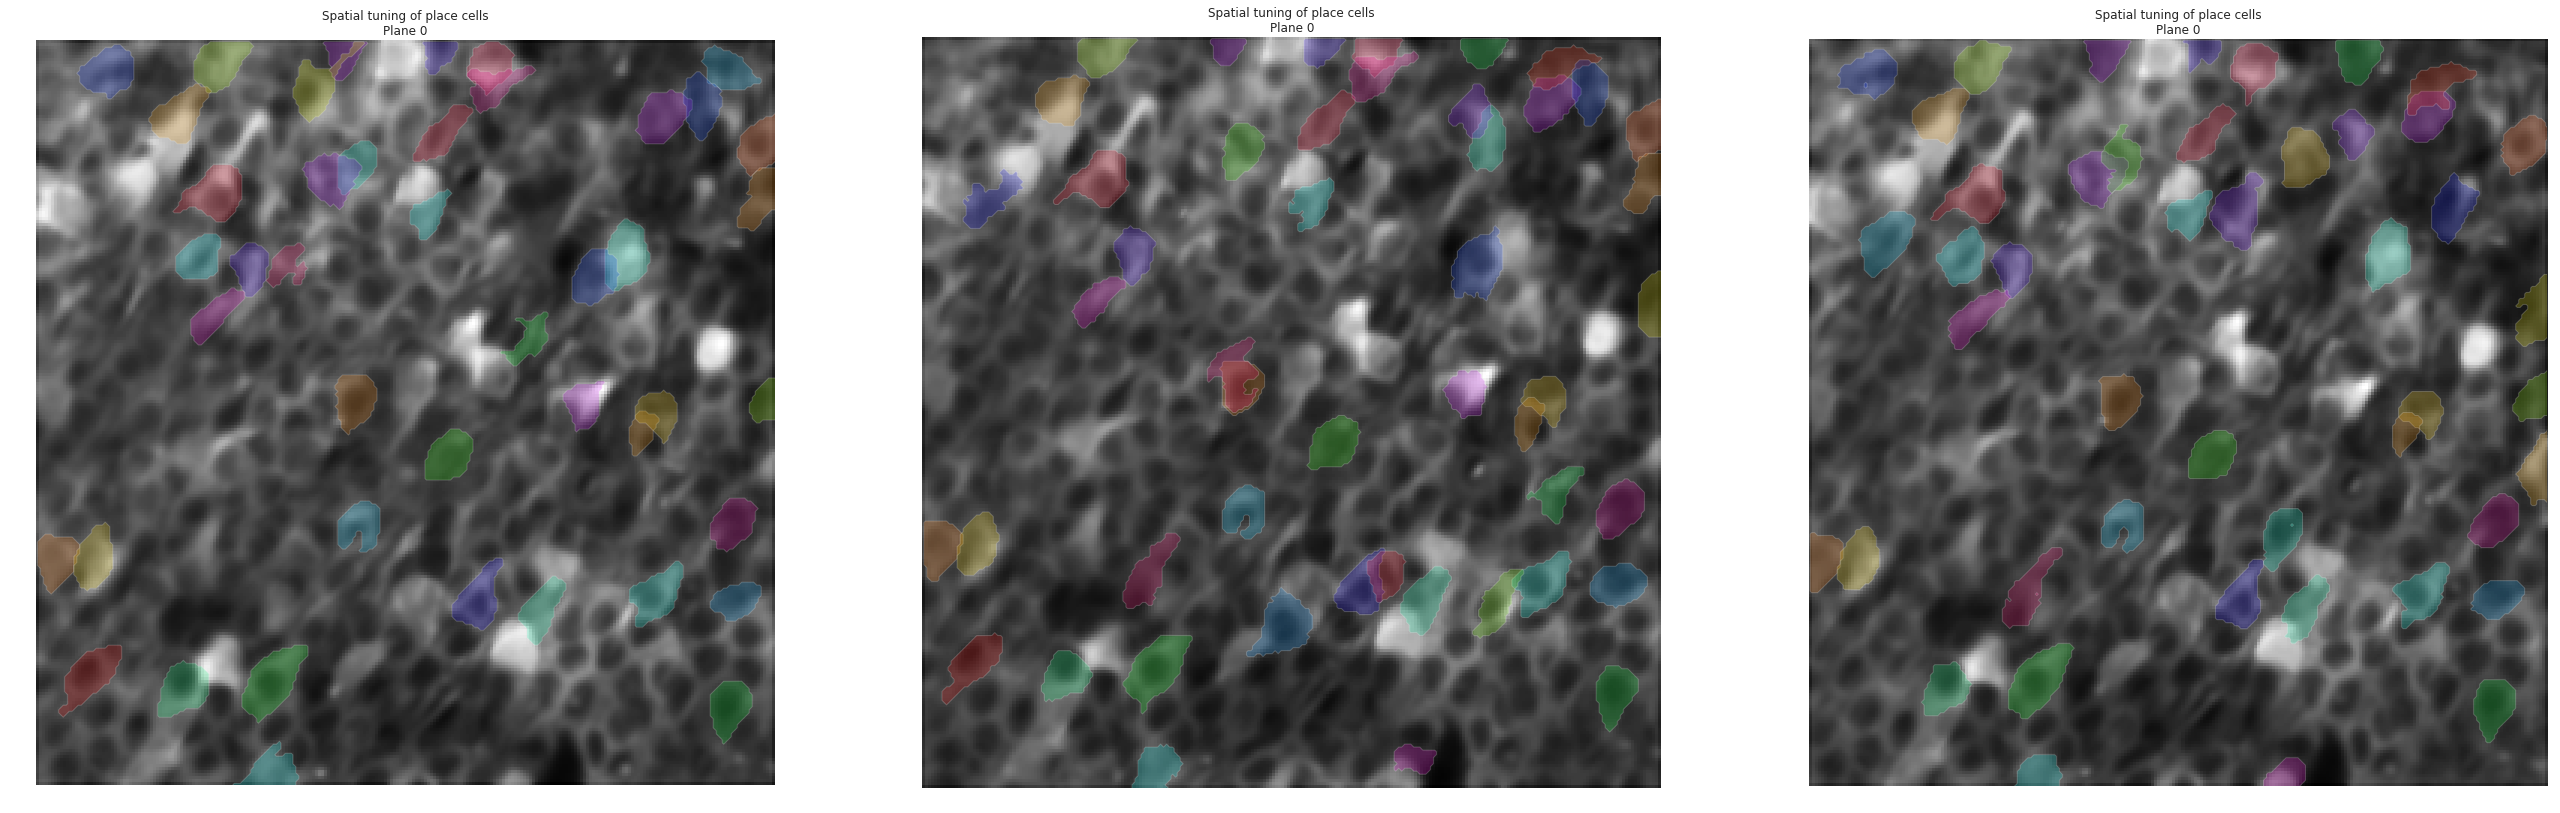

In [29]:
cols = ['condition_day_session','mouseID','day','session','condition','condition_day']

exptGrp = exptGrps[2]

# filter expt  
func1 = lambda df: (df['condition_day'] == 'B_0') & (df['mouseID']=='mjd527')
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)

# get colors
color_df = roi_color_values(grp1,shuffle_colors = True)

# plot rois
fig,axs = plt.subplots(1,3,figsize=(45,35))
plot_rois_across_sessions(axs,grp1)

## multi blank bg

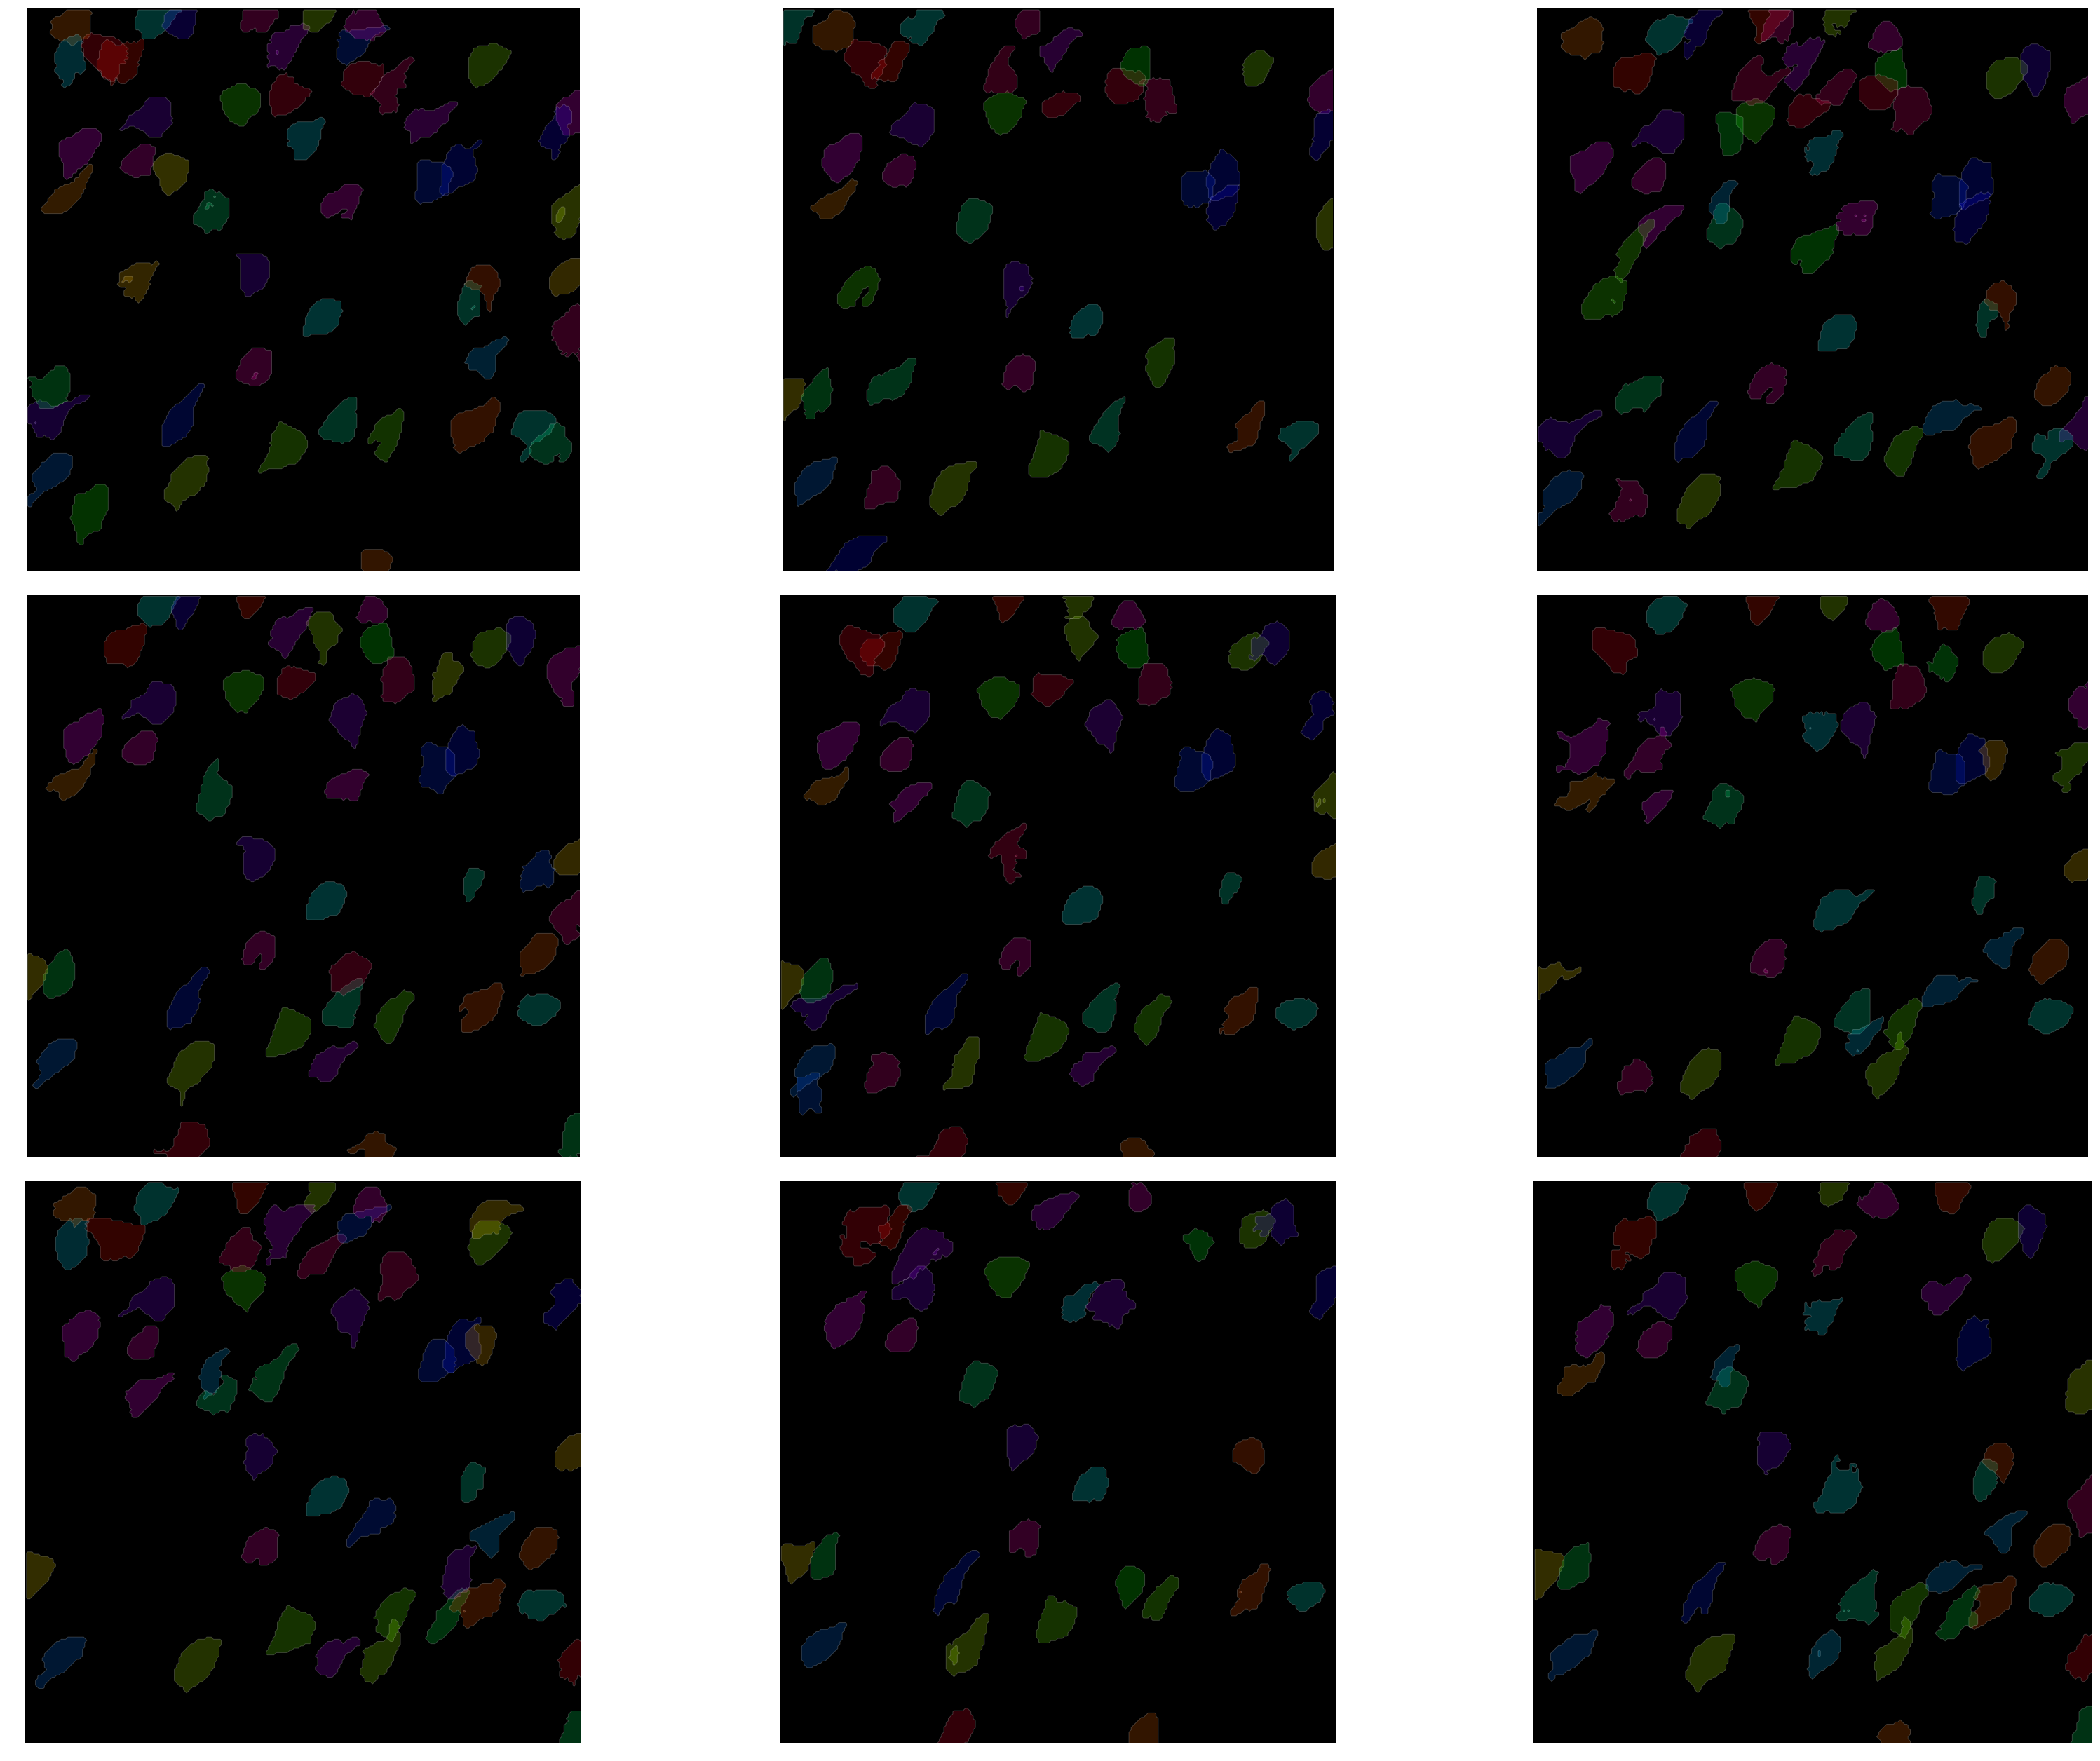

In [2]:
cols = ['condition_day_session','mouseID','day','session','condition','condition_day']

exptGrp = exptGrps[2]

# filter expt  
func1 = lambda df: (df['condition'] == 'A') & (df['mouseID']=='mjd527')
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)

# get colors
color_df = roi_color_values(grp1,shuffle_colors = True)

# plot rois
fig,axs = plt.subplots(3,3,figsize=(45,35))
plt.tight_layout()
plot_rois_across_sessions(axs,grp1,bg_blank=True)

# all sessions

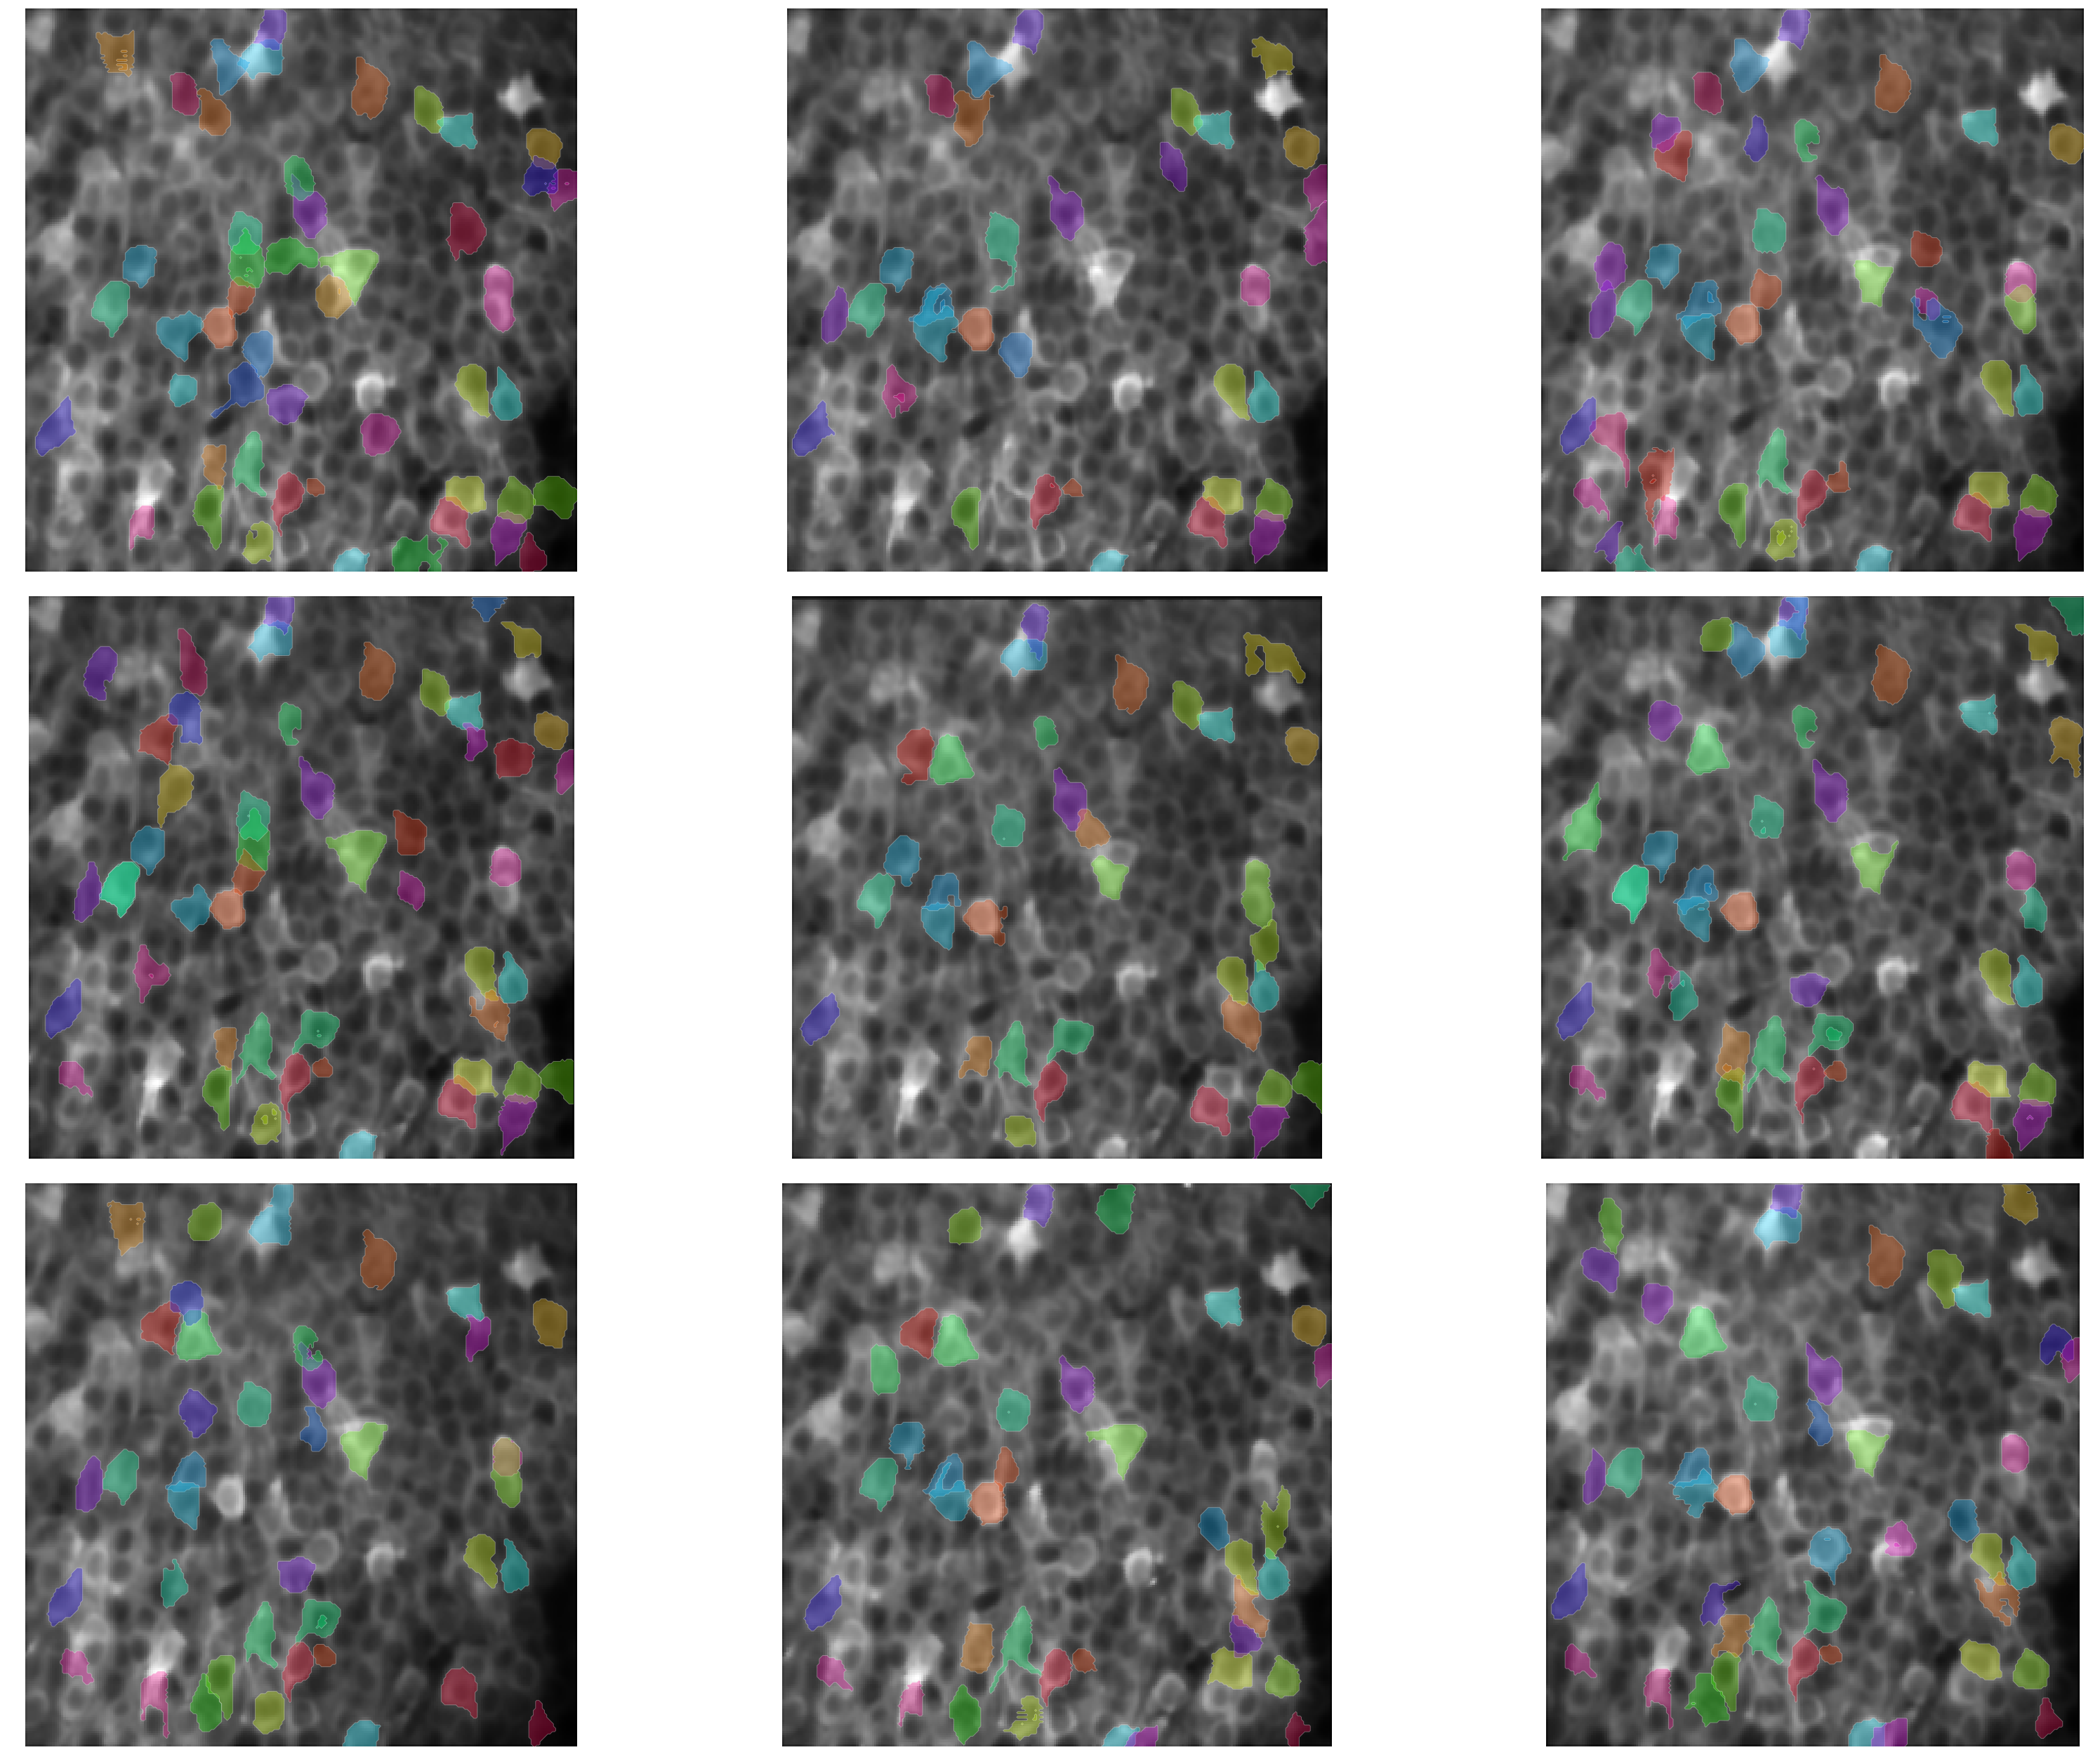

In [5]:
cols = ['condition_day_session','mouseID','day','session','condition','condition_day']

exptGrp = exptGrps[0]

# filter expt  
func1 = lambda df: (df['condition'] == 'A') & (df['mouseID']=='mjd537')
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)

# get colors
color_df = roi_color_values(grp1,shuffle_colors = True)

# plot rois
fig,axs = plt.subplots(3,3,figsize=(45,35))
plt.tight_layout()
plot_rois_across_sessions(axs,grp1,bg_blank=False)

In [16]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09746b0a50>,
      dtype=object)

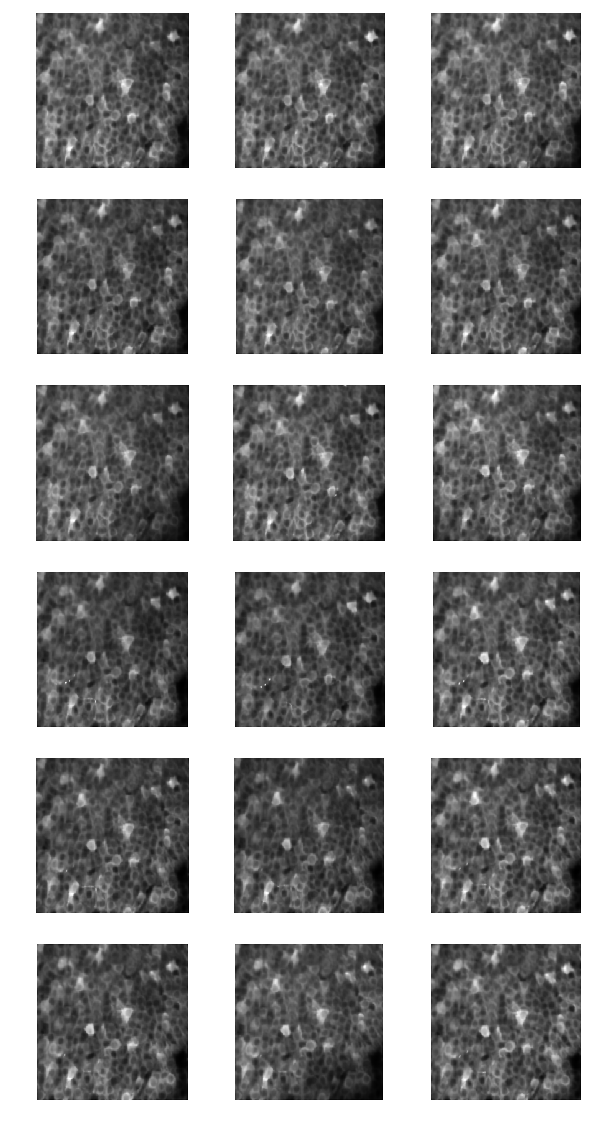

In [30]:
# plot rois
fig,axs = plt.subplots(6,3,figsize=(10,20))
#fig.tight_layout()
plt.axis('off')

for e,ax in zip(grp1,axs.flatten()):
        
        #g = exptGrp.subGroup([e])
        bg = e.returnFinalPrototype(
            channel=grp1.args['channel'])[0, ...]
        ax.imshow(bg,cmap='gray')
        ax.axis('off')
        
fig.savefig('figs/supp/18-sessions-FOV.svg')

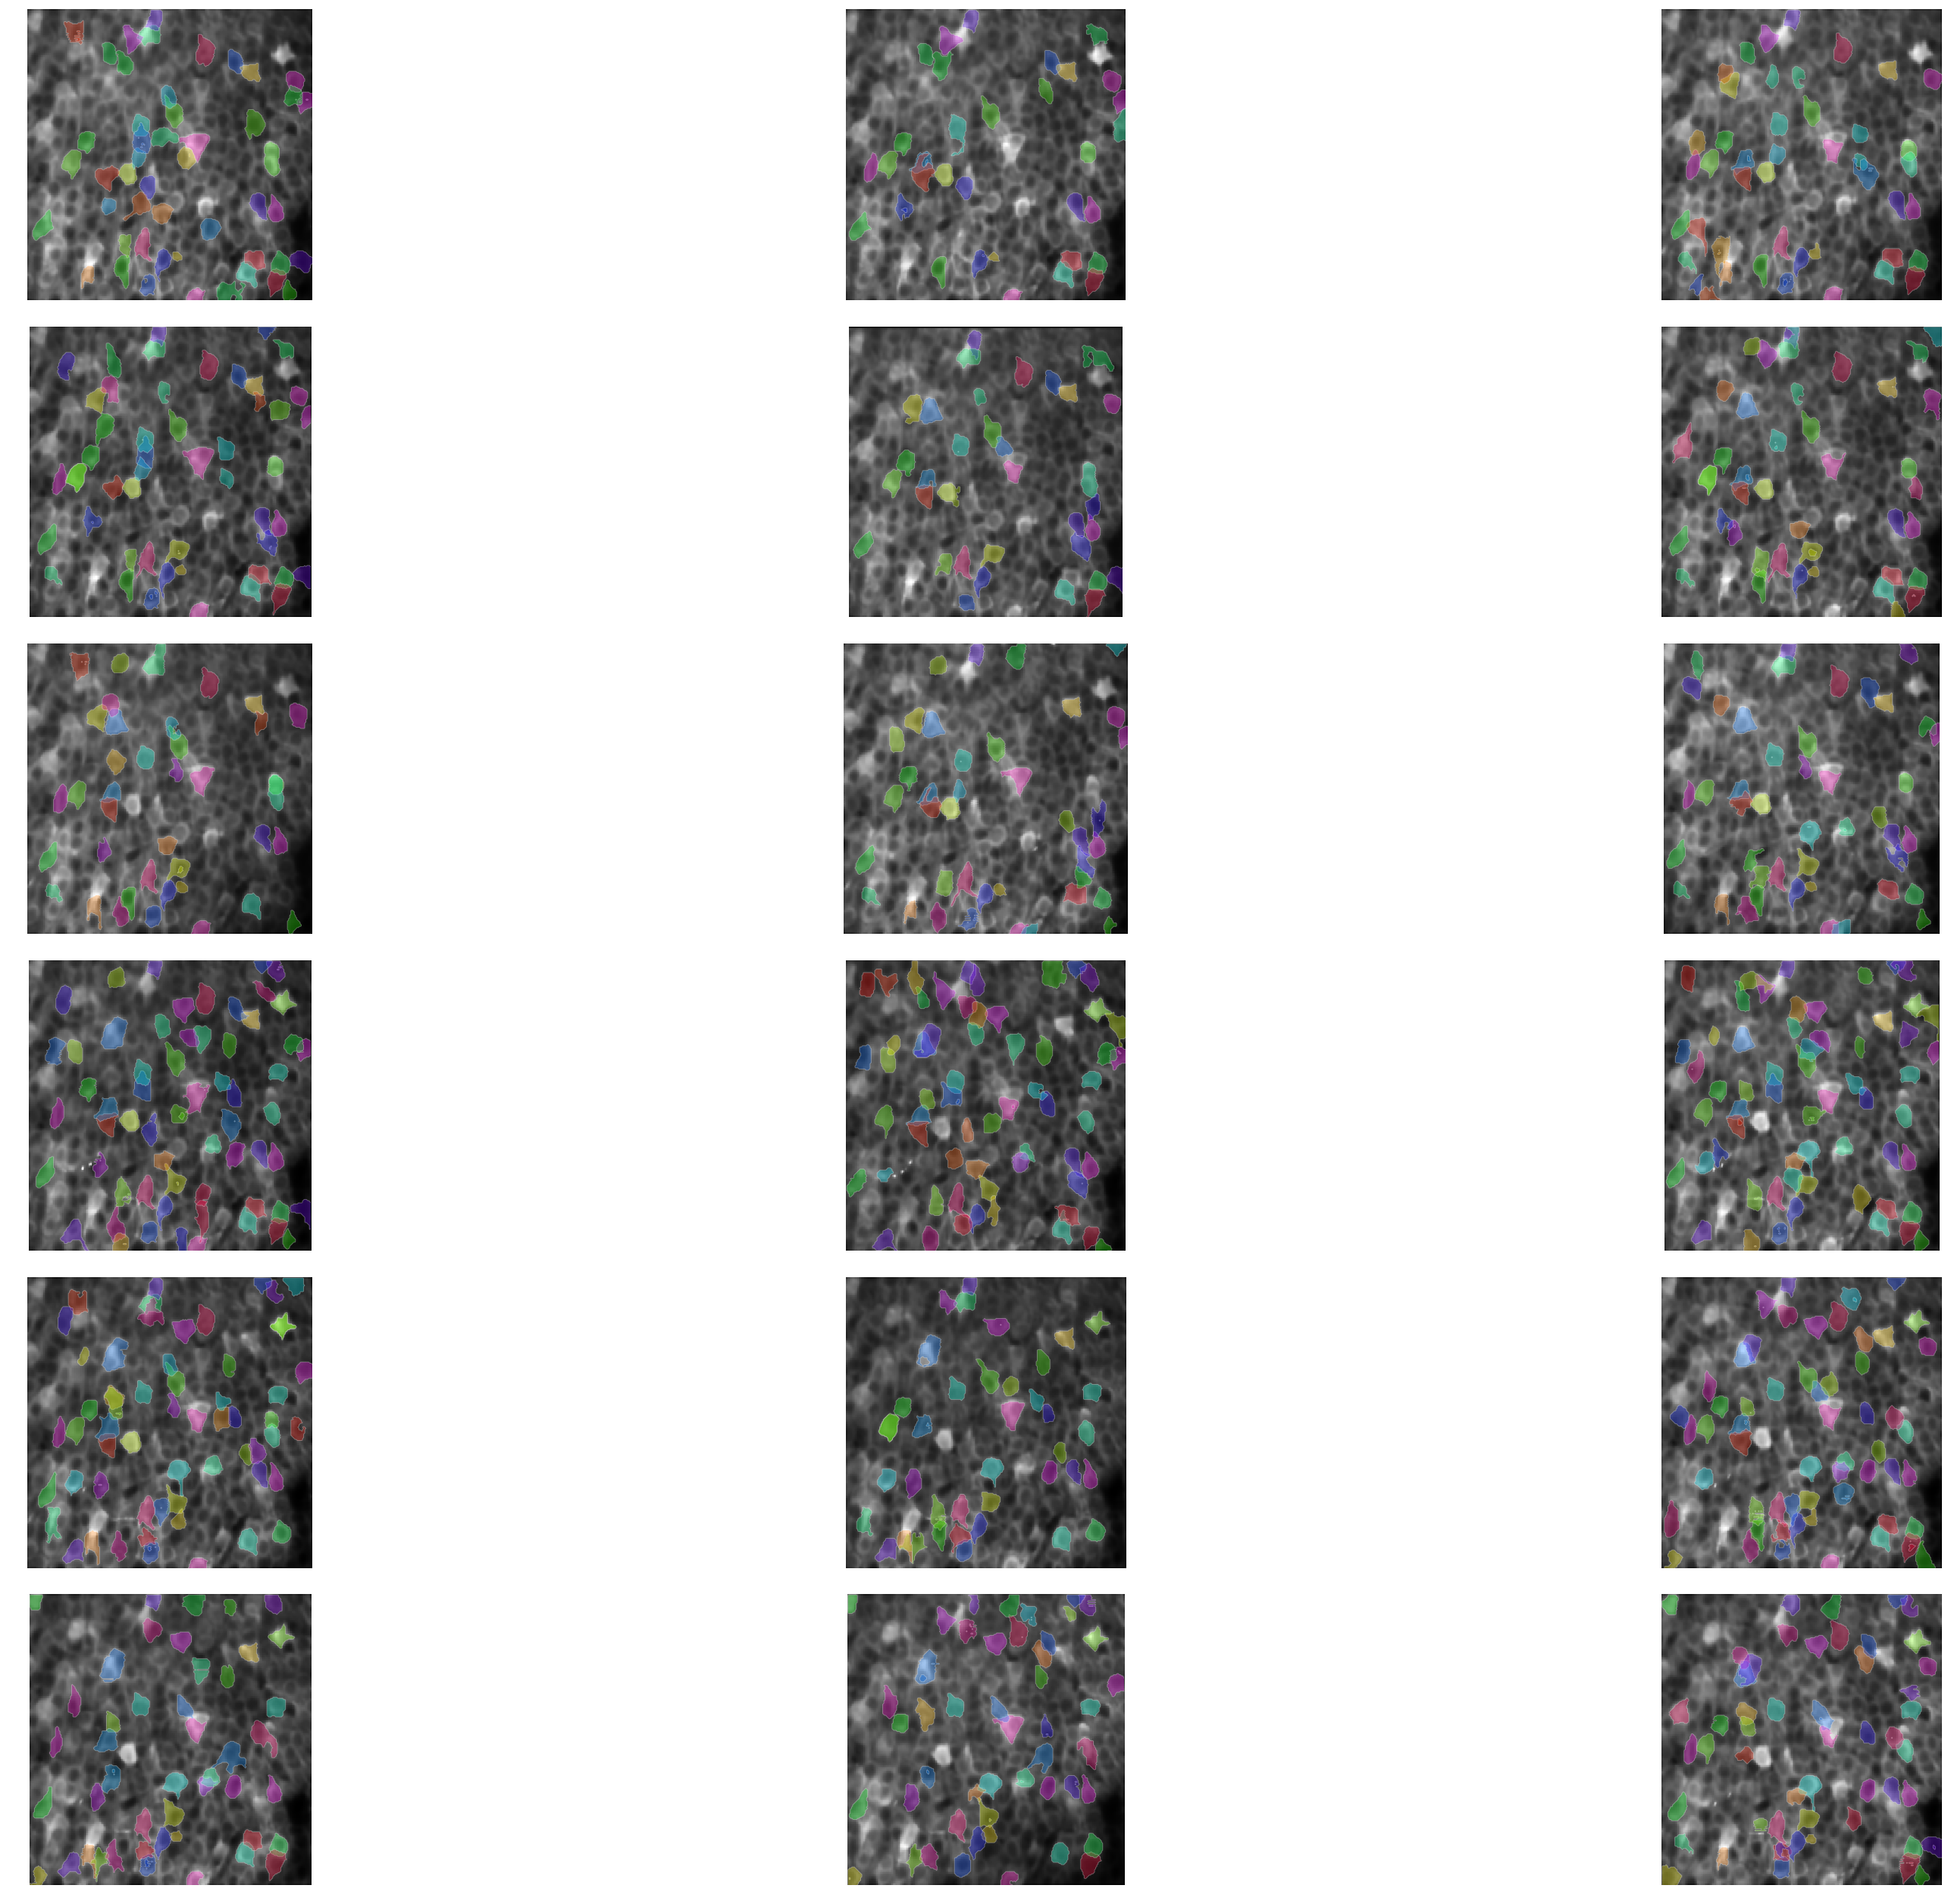

In [6]:
# filter expt
exptGrp = exptGrps[0]
func1 = lambda df: (df['mouseID']=='mjd537')
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)



In [ ]:
cols = ['condition_day_session','mouseID','day','session','condition','condition_day']

exptGrp = exptGrps[2]

# filter expt  
func1 = lambda df: (df['condition'] == 'A') & (df['mouseID']=='mjd527')
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)

# get colors
color_df = roi_color_values(grp1,shuffle_colors = True)

# plot rois
fig,axs = plt.subplots(3,3,figsize=(45,35))
plt.tight_layout()
plot_rois_across_sessions(axs,grp1,bg_blank=False)

## prototype single group
useful f

In [13]:
reload(pca)

<module 'lab.analysis.place_cell_analysis' from '/home/matt/code/analysis/lab/analysis/place_cell_analysis.py'>

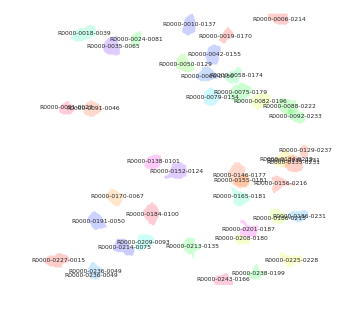

In [3]:
e = grp1[0]
g = grp1.subGroup([e])

fig,ax = plt.subplots(1,figsize=(5,5))
pca.plot_spatial_tuning_overlay(ax,g,bg_blank=True)
plt.show()